**Exercise 1: Data Exploration and Preprocessing**

1. Load and Explore the Data:

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap


In [2]:
data = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

print(data.head(10))

print(data.isnull().sum())

print(data.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

2. Preprocessing:


In [4]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


In [5]:

X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Exercise 2: Implementing the K-Nearest Neighbors (KNN) Model**

1. Implement a KNN Classifier:

In [6]:

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix_knn)


KNN Accuracy: 0.7543859649122807
Confusion Matrix:
 [[63  8]
 [20 23]]


2. Experiment with Different Values of n_neighbors:

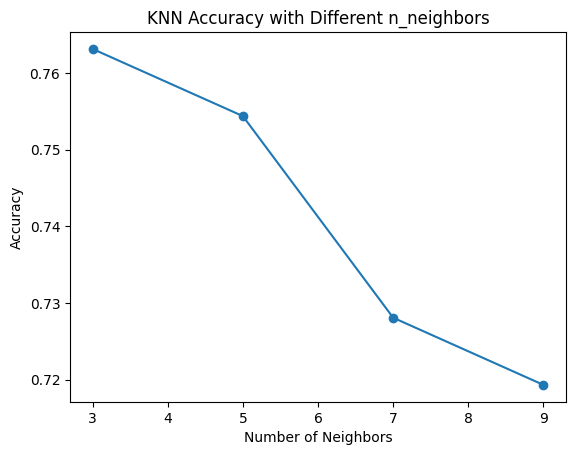

Optimal n_neighbors: 3


In [8]:
neighbors = [3, 5, 7, 9]
accuracies = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy with Different n_neighbors')
plt.show()

optimal_n = neighbors[accuracies.index(max(accuracies))]
print(f"Optimal n_neighbors: {optimal_n}")

**Exercise 3: Implementing Logistic Regression**

1. Logistic Regression Classifier

In [9]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

y_pred_logreg = log_reg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)

class_report_logreg = classification_report(y_test, y_pred_logreg)
print("Classification Report:\n", class_report_logreg)

Logistic Regression Accuracy: 0.6228070175438597
Confusion Matrix:
 [[71  0]
 [43  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Exercise 4: Hyperparameter Tuning and Cross-Validation**

1. Grid Search for KNN Hyperparameter Tuning:


In [10]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan, p=2 for Euclidean distance
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search_knn.fit(X_train, y_train)

print("Best Parameters:", grid_search_knn.best_params_)
print("Best Accuracy:", grid_search_knn.best_score_)

Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Accuracy: 0.8021978021978022


**2. Cross-Validation for Logistic Regression:**

In [11]:
imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

cv_scores_logreg = cross_val_score(LogisticRegression(max_iter=10000), X_imputed, y, cv=5)

print("Cross-Validated Accuracy for Logistic Regression:", cv_scores_logreg.mean())

Cross-Validated Accuracy for Logistic Regression: 0.5747865238317031


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


**Exercise 5: Decision Boundary Visualization**


In [11]:

cancer_data = load_breast_cancer()

# Convert it to a Pandas DataFrame
data = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
data['diagnosis'] = cancer_data.target  # Add the target (diagnosis) column

X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [14]:
# Experiment with different values of n_neighbors
neighbors = [3, 5, 7, 9]
cv_scores = []

# Perform cross-validation to find the best number of neighbors
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal n_neighbors
optimal_n = neighbors[np.argmax(cv_scores)]

print(f"The optimal number of neighbors is {optimal_n}")

The optimal number of neighbors is 5


In [15]:
# Step 1: Fit KNN and Logistic Regression to 2D data
knn_pca = KNeighborsClassifier(n_neighbors=optimal_n).fit(X_train_pca, y_train)
log_reg_pca = LogisticRegression(max_iter=10000).fit(X_train_pca, y_train)

# Step 2: Predict and evaluate models
y_pred_knn = knn_pca.predict(X_test_pca)
y_pred_log_reg = log_reg_pca.predict(X_test_pca)

# Continue with evaluation (confusion matrix, accuracy, etc.)


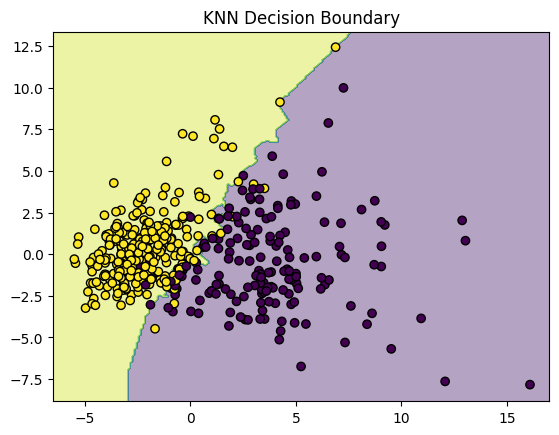

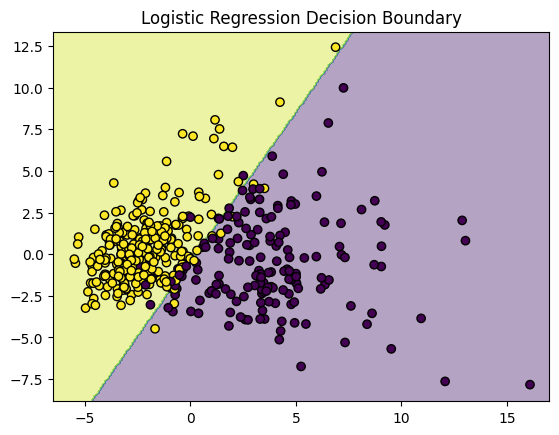

In [16]:
# Reduce dataset to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit KNN and Logistic Regression to 2D data
knn_pca = KNeighborsClassifier(n_neighbors=optimal_n).fit(X_train_pca, y_train)
log_reg_pca = LogisticRegression(max_iter=10000).fit(X_train_pca, y_train)

# Define function for decision boundary visualization
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(knn_pca, X_train_pca, y_train, 'KNN Decision Boundary')
plot_decision_boundary(log_reg_pca, X_train_pca, y_train, 'Logistic Regression Decision Boundary')

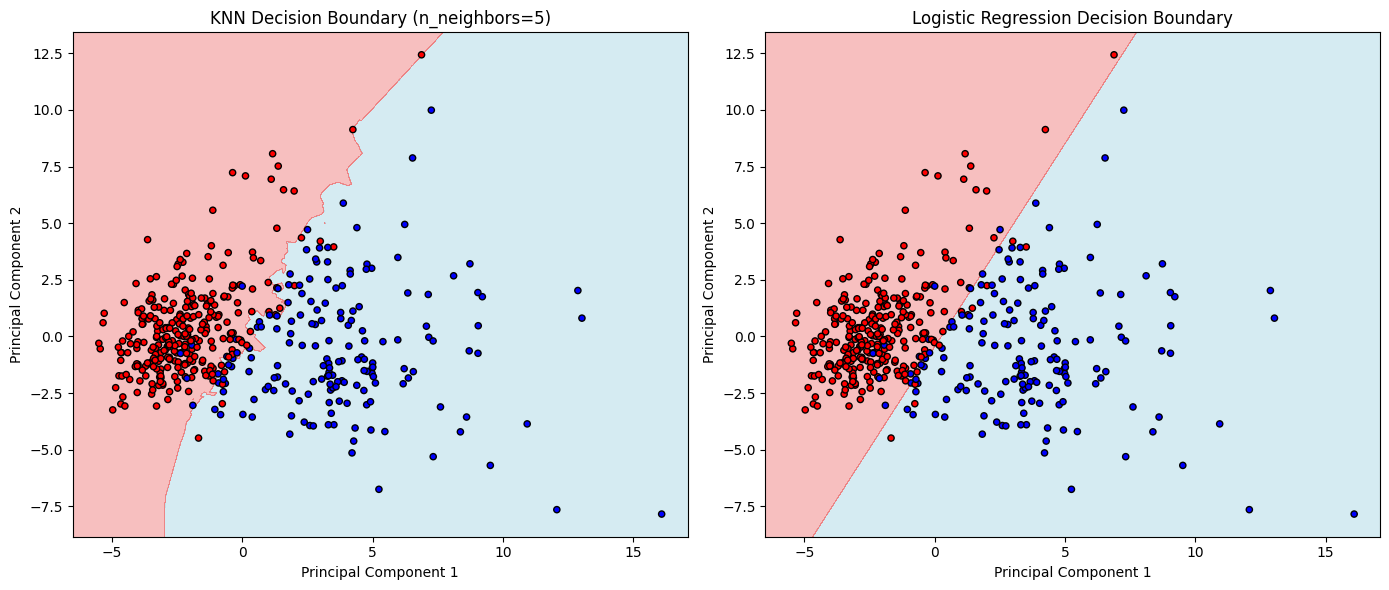

In [19]:
# Step 1: Fit models to PCA-reduced data
knn_pca = KNeighborsClassifier(n_neighbors=optimal_n).fit(X_train_pca, y_train)
log_reg_pca = LogisticRegression(max_iter=10000).fit(X_train_pca, y_train)

# Step 2: Create a mesh grid for decision boundary plotting
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Step 3: Predict labels for each point in the mesh grid for KNN
Z_knn = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

# Step 4: Predict labels for each point in the mesh grid for Logistic Regression
Z_logreg = log_reg_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_logreg = Z_logreg.reshape(xx.shape)

# Step 5: Plot the decision boundary and data points for KNN
plt.figure(figsize=(14, 6))

# KNN Decision Boundary
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_knn, alpha=0.5, cmap=ListedColormap(('lightblue', 'lightcoral')))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k', cmap=ListedColormap(('blue', 'red')))
plt.title(f'KNN Decision Boundary (n_neighbors={optimal_n})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Logistic Regression Decision Boundary
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_logreg, alpha=0.5, cmap=ListedColormap(('lightblue', 'lightcoral')))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k', cmap=ListedColormap(('blue', 'red')))
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()